In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
dir1 = ('C:/Users/KUSHAGRA/Downloads/Compressed/Soft Computing Project/Training')
category = []

for file in os.listdir(dir1):
    category.append(file)
    
    
for i in category:
    file_path = os.path.join(dir1,i)
    
    for file in os.listdir(file_path):
        img_path = os.path.join(file_path,file)
        image = cv2.imread(img_path)
    

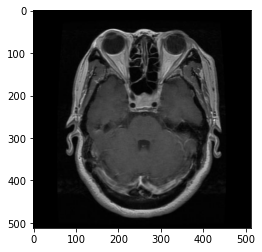

In [3]:
plt.imshow(image)

In [4]:
print(image.shape)

(512, 512, 3)


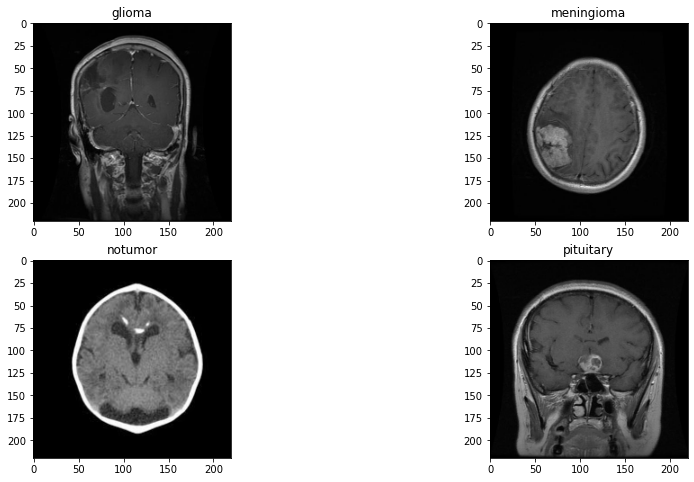

In [5]:
plt.figure(figsize=(15,8))

categorical_images = ['C:/Users/KUSHAGRA/Downloads/Compressed/Soft Computing Project/Training/glioma/Tr-gl_0010.jpg', 'C:/Users/KUSHAGRA/Downloads/Compressed/Soft Computing Project/Training/meningioma/Tr-me_0010.jpg', 'C:/Users/KUSHAGRA/Downloads/Compressed/Soft Computing Project/Training/notumor/Tr-no_0010.jpg', 'C:/Users/KUSHAGRA/Downloads/Compressed/Soft Computing Project/Training/pituitary/Tr-pi_0010.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    img = cv2.imread(categorical_images[i])
    img = cv2.resize(img, (220, 220))
    plt.imshow(img)
    plt.title(category[i])

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0.3,
                                    zoom_range = 0.4,
                                    width_shift_range=0.4,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train = train_datagen.flow_from_directory('C:/Users/KUSHAGRA/Downloads/Compressed/Soft Computing Project/Training',target_size=(200,200),class_mode='categorical',batch_size=32,color_mode='grayscale')
test=test_datagen.flow_from_directory('C:/Users/KUSHAGRA/Downloads/Compressed/Soft Computing Project/Testing',target_size=(200,200),class_mode='categorical',batch_size=32,color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [9]:
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
model = Sequential()

#adding Layers to  the model
#Layer 1
model.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 2
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Layer 5
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 6
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      3200      
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     401536    
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 128)    512       
 hNormalization)                                                 
                                                        

In [11]:
model_earlyStoppage = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 10, verbose = 1)

Fit = model.fit(train, epochs=20, validation_data=test,callbacks=model_earlyStoppage)

Epoch 1/20
179/179 [==============================] - 1731s 10s/step - loss: 1.7959 - categorical_accuracy: 0.5009 - val_loss: 1.2792 - val_categorical_accuracy: 0.4111
Epoch 2/20
179/179 [==============================] - 1612s 9s/step - loss: 0.9621 - categorical_accuracy: 0.6318 - val_loss: 1.8501 - val_categorical_accuracy: 0.2838
Epoch 3/20
179/179 [==============================] - 1649s 9s/step - loss: 0.8875 - categorical_accuracy: 0.6558 - val_loss: 3.4612 - val_categorical_accuracy: 0.3524
Epoch 4/20
179/179 [==============================] - 1565s 9s/step - loss: 0.8075 - categorical_accuracy: 0.6784 - val_loss: 2.9319 - val_categorical_accuracy: 0.3944
Epoch 5/20
179/179 [==============================] - 1564s 9s/step - loss: 0.7192 - categorical_accuracy: 0.7190 - val_loss: 1.9576 - val_categorical_accuracy: 0.3707
Epoch 6/20
179/179 [==============================] - 1563s 9s/step - loss: 0.7058 - categorical_accuracy: 0.7244 - val_loss: 2.5169 - val_categorical_accuracy

In [12]:
model.save('BraintumorCNN.h5')

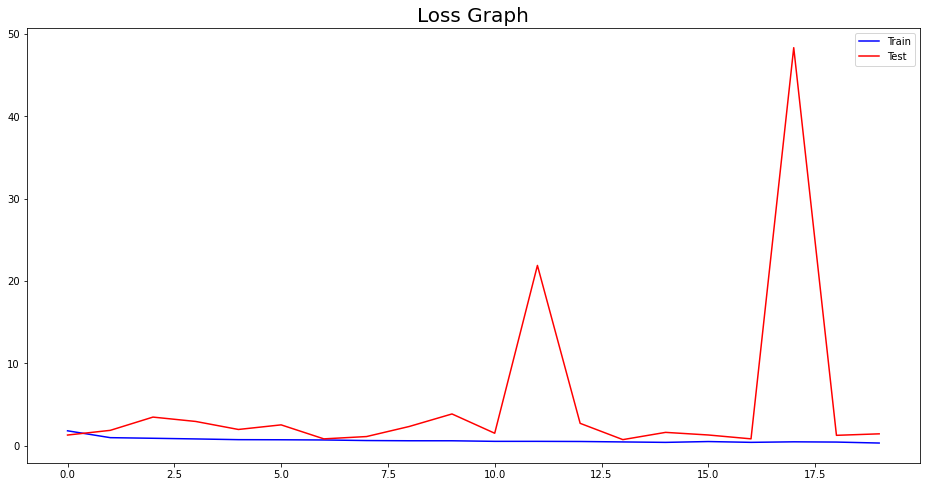

In [14]:
plt.figure(figsize=(16,8))
plt.plot(Fit.history['loss'], c = 'blue')
plt.plot(Fit.history['val_loss'], c = 'red')
plt.legend(['Train', 'Test'])
plt.title('Loss Graph', size = 20)
plt.show()

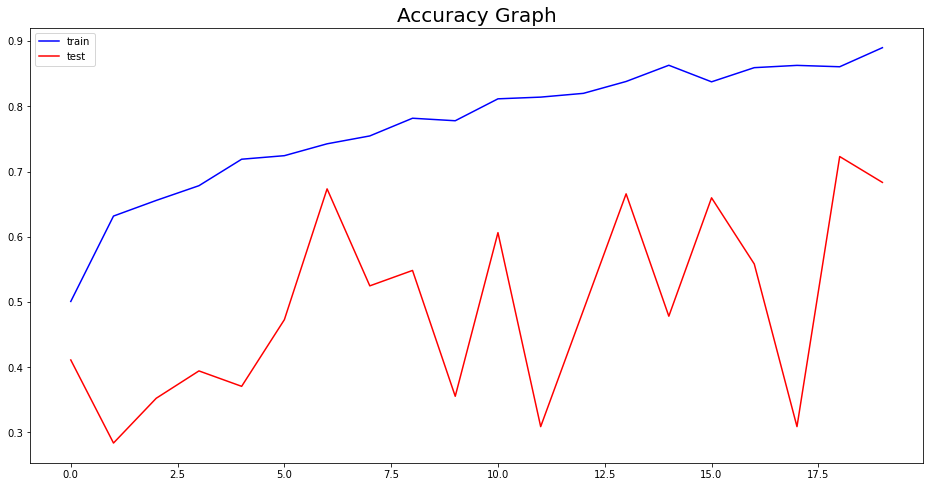

In [15]:
plt.figure(figsize=(16,8))
plt.plot(Fit.history["categorical_accuracy"],c = "blue")
plt.plot(Fit.history["val_categorical_accuracy"],c = "red")
plt.legend(["train", "test"])
plt.title('Accuracy Graph', size = 20)
plt.show()

In [16]:
from tensorflow.keras.models import load_model

model1 = load_model('BraintumorCNN.h5')

In [17]:
IMG_SIZE = 200
def images(filepath):
    img_array = cv2.imread(filepath)
    img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [18]:
def predict(prediction):
    if np.argmax(prediction) == 0:
        print('Glioma')
    elif np.argmax(prediction) == 1:
        print('Meningioma')   
    elif np.argmax(prediction) == 2:
        print('No tumor')    
    else:
        print('Pituatary')

### Making Predictions

1/1 [==============================] - 1s 763ms/step
Pituatary


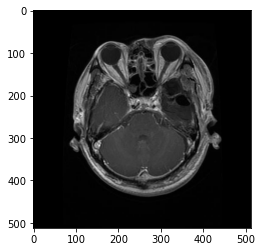

In [21]:
image_path = ('C:/Users/KUSHAGRA/Downloads/Compressed/Soft Computing Project/Testing/glioma/Te-gl_0011.jpg')
plt.imshow(plt.imread(image_path))
image_prepared = images(image_path)
prediction = model1.predict(image_prepared)
predict(prediction)

1/1 [==============================] - 0s 106ms/step
No tumor


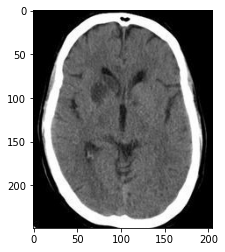

In [20]:
image_path = ('C:/Users/KUSHAGRA/Downloads/Compressed/Soft Computing Project/Testing/notumor/Te-no_0010.jpg')
plt.imshow(plt.imread(image_path))
image_prepared = images(image_path)
prediction = model1.predict(image_prepared)
predict(prediction)

1/1 [==============================] - 0s 141ms/step
No tumor


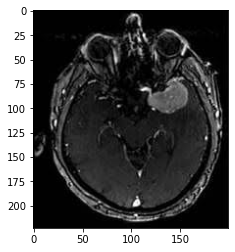

In [22]:
image_path = ('C:/Users/KUSHAGRA/Downloads/Compressed/Soft Computing Project/Testing/meningioma/Te-me_0011.jpg')
plt.imshow(plt.imread(image_path))
image_prepared = images(image_path)
prediction = model1.predict(image_prepared)
predict(prediction)